`pip install -U atom-ml`
https://github.com/tvdboom/ATOM

In [2]:
import numpy as np
import pandas as pd
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups
# Load the dataset (get only 5 topics)
X, y = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
    ],
)
# atom expects a 2-dimensional array, so reshape to (n_articles, 1)
X = np.array(X).reshape(-1, 1)
# Initialize atom
atom = ATOMClassifier(X, y, test_size=0.2, verbose=2)

C:\Users\thong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<< ================== ATOM ================== >>
Algorithm task: multiclass classification.

Dataset stats ==================== >>
Shape: (2846, 2)
Memory: 5.13 MB
Scaled: False
Categorical features: 1 (100.0%)
-------------------------------------
Train set size: 2277
Test set size: 569
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   384 (1.0) |    96 (1.0) |
| 1 |   593 (1.2) |   475 (1.2) |   118 (1.2) |
| 2 |   585 (1.2) |   468 (1.2) |   117 (1.2) |
| 3 |   594 (1.2) |   475 (1.2) |   119 (1.2) |
| 4 |   594 (1.2) |   475 (1.2) |   119 (1.2) |



In [3]:
atom.dataset

,corpus,target
0,From: dlb5404@tamuts.tamu.edu (Daryl Biberdorf...,3
1,From: kmr4@po.CWRU.edu (Keith M. Ryan)\nSubjec...,0
2,From: dshaker@qualix.com (Doug Shaker)\nSubjec...,1
3,From: jfare@53iss6.Waterloo.NCR.COM (Jim Fare)...,4
4,From: michaelr@spider.co.uk (Michael S. A. Rob...,1
...,...,...
2841,From: keith@cco.caltech.edu (Keith Allan Schne...,0
2842,From: ttesta@kali.enet.dec.com (Tom Testagross...,2
2843,From: keith@cco.caltech.edu (Keith Allan Schne...,0
2844,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...,4


In [4]:
atom.textclean()

Cleaning the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 10012 emails from 2830 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 2214 HTML tags from 1304 documents.
 --> Dropping 2 emojis from 1 documents.
 --> Dropping 31222 numbers from 2843 documents.
 --> Dropping punctuation from the text.


In [5]:
atom.drops

,email,url,html,emoji,number
0,"[dlb5404@tamuts.tamu.edu, d-biberdorf@tamu.edu]",NaN,NaN,NaN,[9]
1,[kmr4@po.cwru.edu],NaN,NaN,NaN,[16]
2,"[dshaker@qualix.com, dshaker@qualix.com, kul@u...",NaN,NaN,NaN,"[1, 2, 43, 1, 2, 1, 1, 7, 1, 2, 415, 572, 0200..."
3,"[jfare@53iss6.waterloo.ncr.com, jfare@53iss6.w...",NaN,NaN,NaN,"[15, 6, 6]"
4,"[michaelr@spider.co.uk, tkld.93apr2123341@burn...",NaN,[<>],NaN,"[44, 6502, 6809, 68000, 2, 8086, 68000, 50, 50..."
...,...,...,...,...,...
1288,NaN,NaN,NaN,NaN,"[15, 1, 1, 1097, 08836, 908, 563, 9033, 908, 5..."
1888,NaN,NaN,NaN,NaN,[17]
1905,NaN,NaN,NaN,NaN,"[13, 93, 212, 274, 0646, 1097, 08836, 908, 563..."
2260,NaN,NaN,NaN,NaN,"[27, 15, 27, 225, 250, 412, 624, 6115, 371, 0154]"


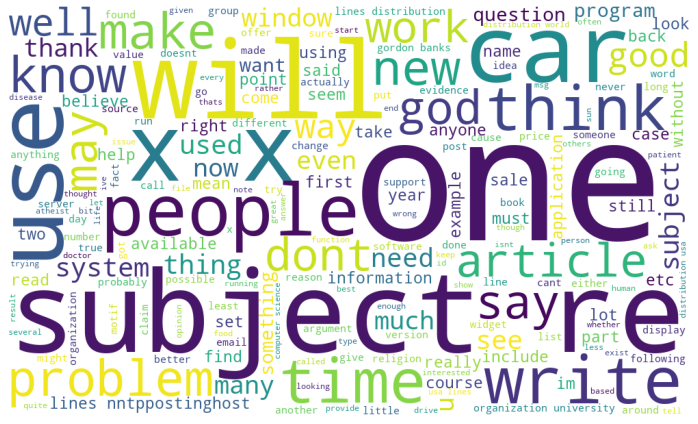

In [6]:
atom.plot_wordcloud()